In [5]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df=pd.read_csv("people_cluster.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().any().any()

False

In [9]:
#Taking inferences about the Customers.

Text(0, 0.5, 'Count')

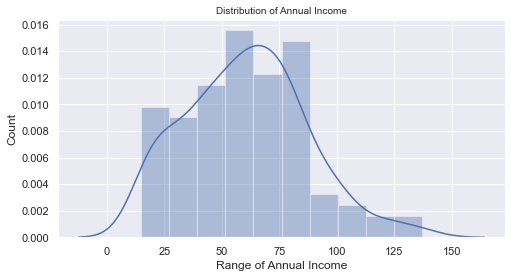

In [10]:
sns.set(style = 'darkgrid')
plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 10)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

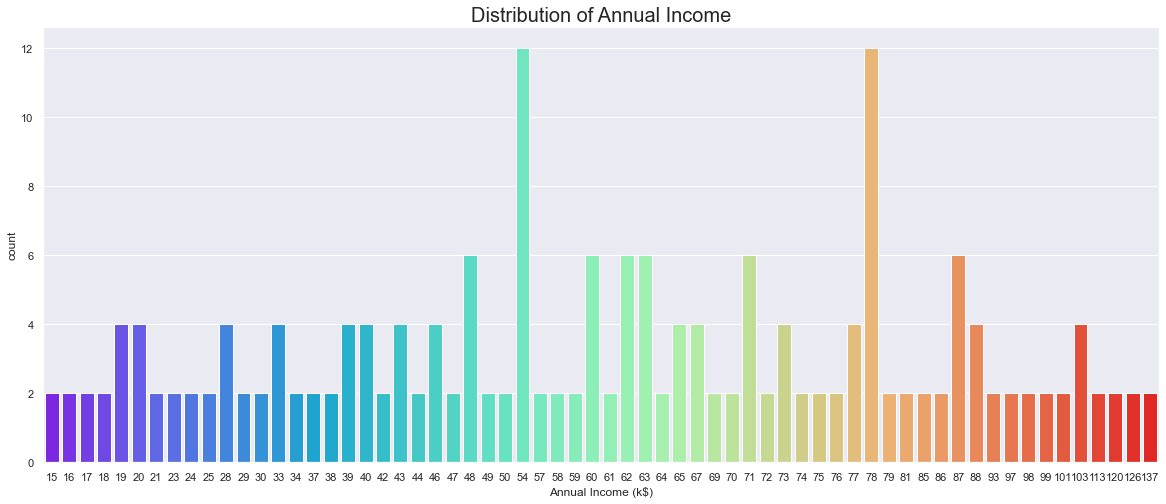

In [11]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Text(0, 0.5, 'Count')

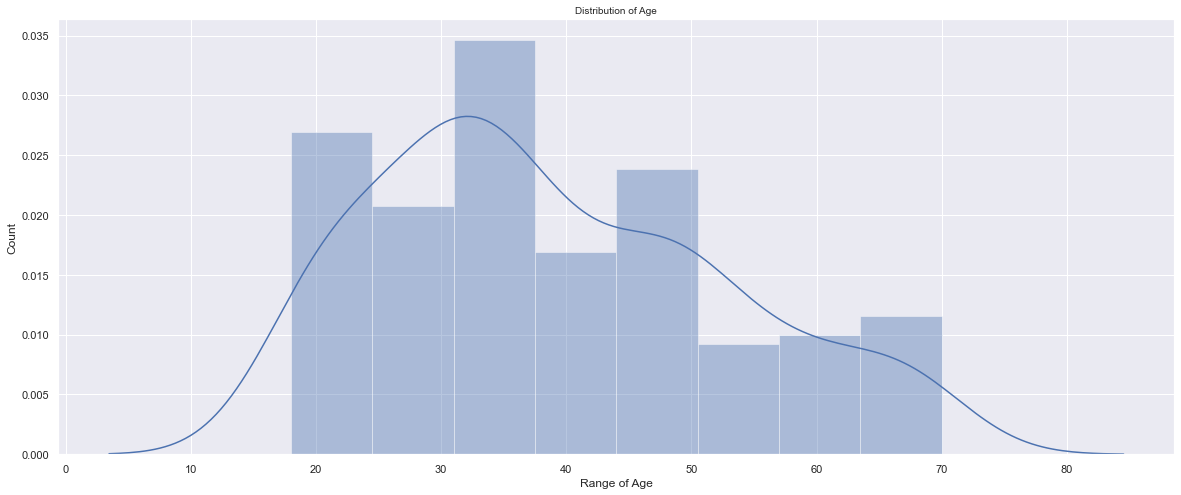

In [12]:
##for i in range(2,df.shape[1]):
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 10)
plt.xlabel('Range of Age')
plt.ylabel('Count')

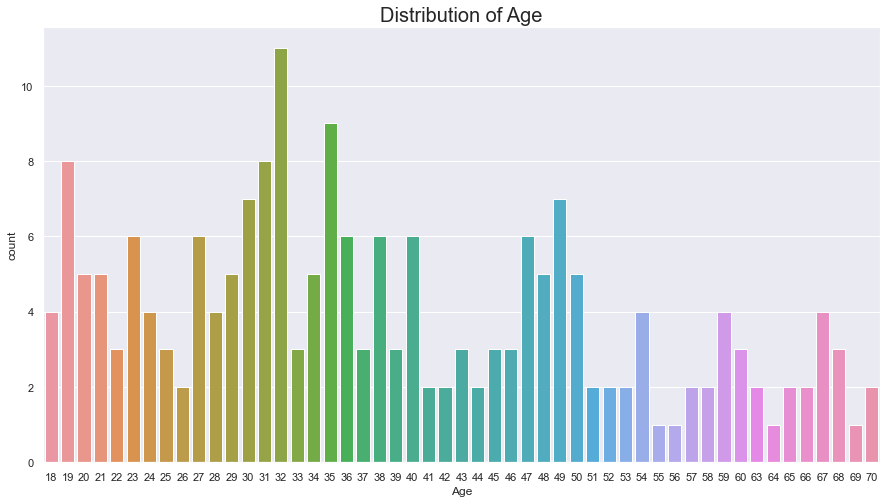

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age']) #palette = 'hsv'
plt.title('Distribution of Age', fontsize = 20)
plt.show()

([<matplotlib.patches.Wedge at 0x7ff6f810e0a0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.22485758633183306, -1.1787446991902115, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.13116692536023594, -0.6876010745276234, '44.00%')])

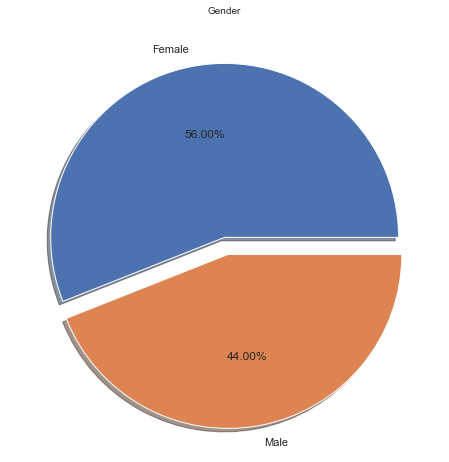

In [14]:
k=df['Gender'].value_counts()
plt.title('Gender', fontsize = 10)
labels = ['Female', 'Male']
explode = [0, 0.1]
plt.pie(k, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')

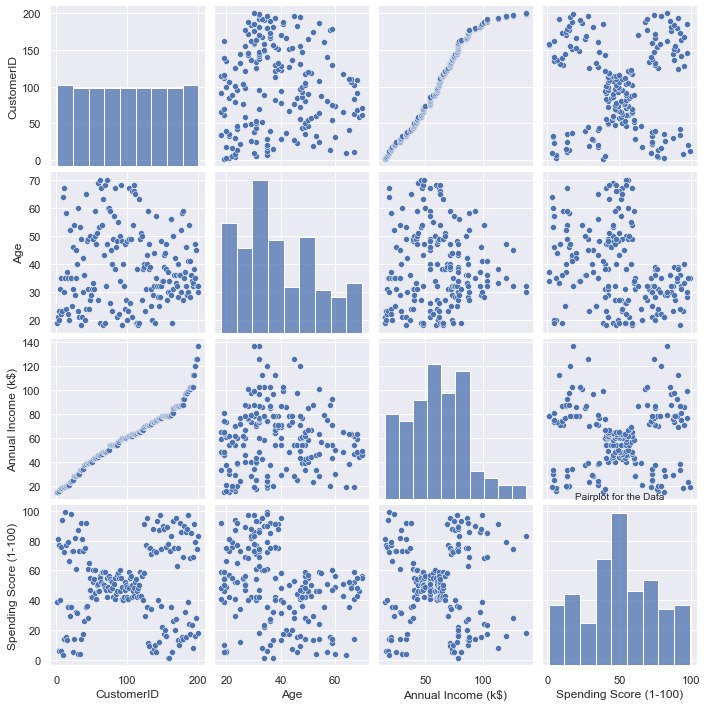

In [15]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 10)
plt.show()

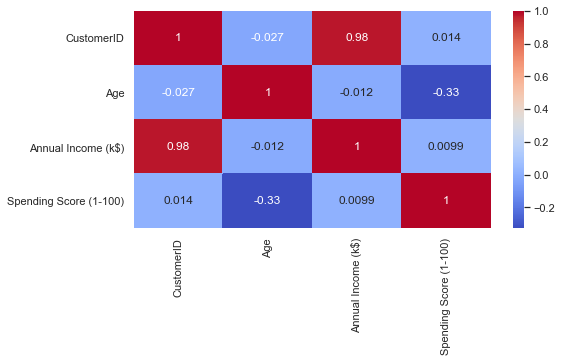

In [16]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

# K-Means Clustering

(200, 2)


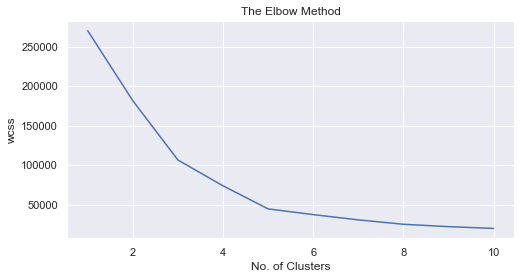

In [23]:
x = df.iloc[:, [3, 4]].values
# let's check the shape of x
print(x.shape)
(200, 2)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

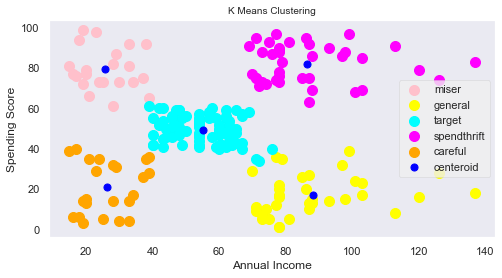

In [28]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=1)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label='centeroid')
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 10)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Hierarchial Clustering

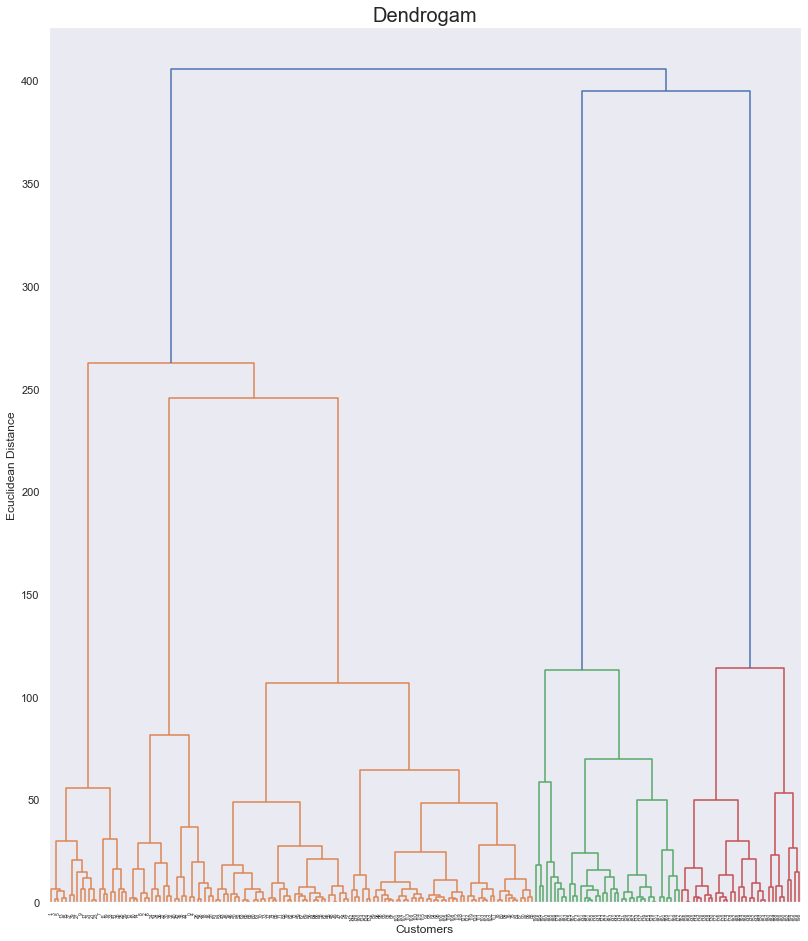

In [29]:
import scipy.cluster.hierarchy as sch
sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = (12,15)

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

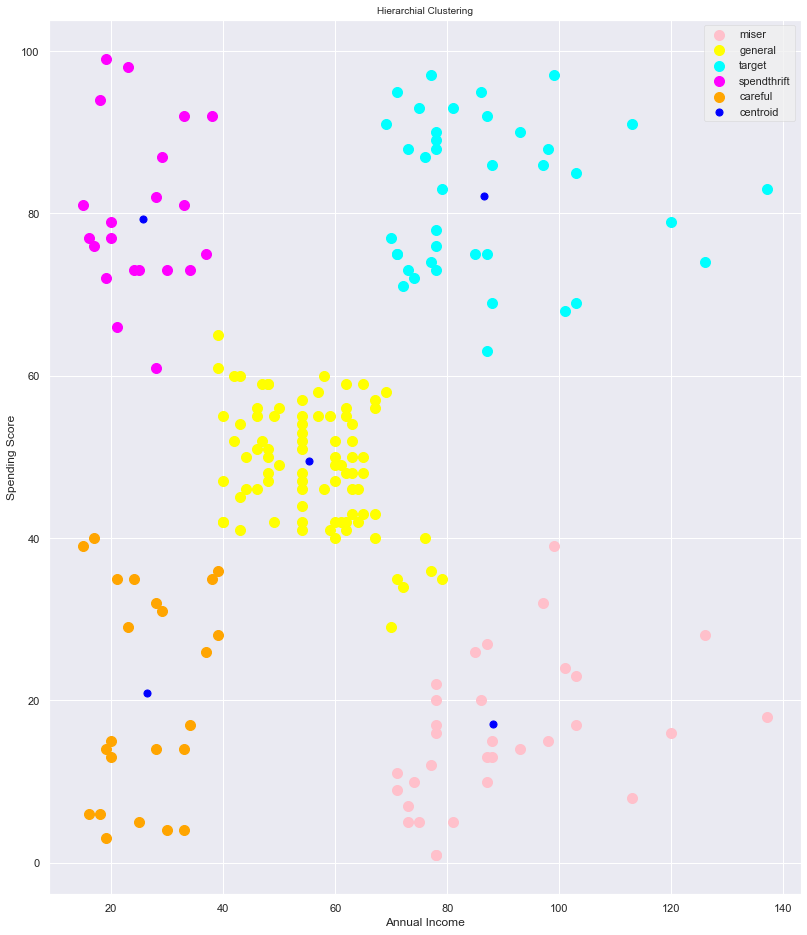

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label='centroid')
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 10)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [42]:
#Acccuracy
def Model_Accuracy(y,y_pred):
    c=0
    for i in range(len(y)):
        if (y[i]==y_pred[i]):
            c+=1
    return c/len(y)

    result=Model_Accuracy(y,y_pred)
    print(result)


# Clusters of Customers Based on their Ages.

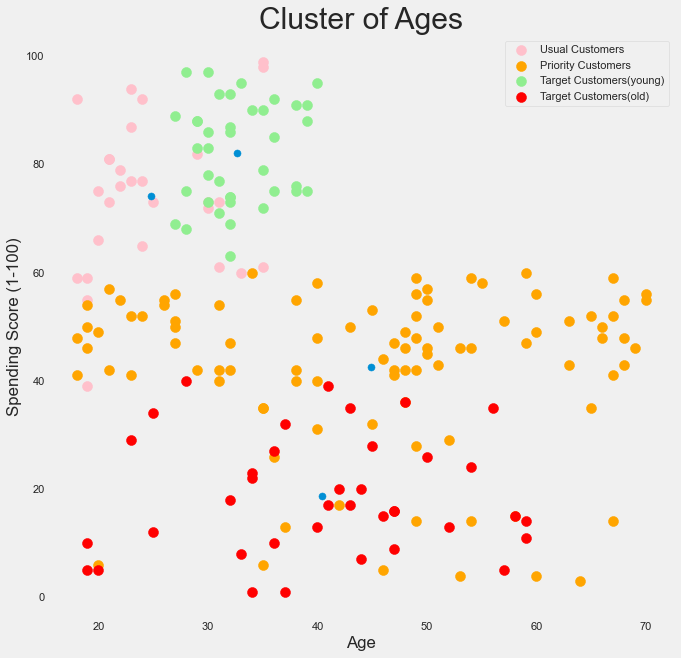

In [45]:
x = df.iloc[:, [2, 4]].values
x.shape
(200, 2)

x = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=1)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state=1)
ymeans = kmeans.fit_predict(x)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50) 
plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
'''optimize the spending scores of the customer in the Mall.

4 different categories namely:
Usual Customers
Priority Customers
Senior Citizen
Target Customers
Young Target Customers.
Then after getting the results we can accordingly make different marketing strategies and
policies to optimize the spending scores of the customer in the Mall.'''